# Установка PySpark

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q www-us.apache.org/dist/spark/spark-2.4.3/spark-2.4.3-bin-hadoop2.7.tgz

In [ ]:
!tar -xvf spark-2.4.3-bin-hadoop2.7.tgz

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.3-bin-hadoop2.7"

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=b18c01dc23b2684718d10bef18649cbf93f029adc7587b69af1dd0956e13280f
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
# import findspark
# findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

# Загрузка данных из CSV

In [82]:
df = spark.read.csv('power.csv', inferSchema=True, header=True)

# Базовый обзор данных

In [ ]:
df.count()

1189482

In [4]:
df.dtypes

[('country', 'string'),
 ('year', 'int'),
 ('quantity', 'double'),
 ('category', 'int')]

In [ ]:
df.take(2)

[Row(country='Austria', year=1996, quantity=5.0, category=1),
 Row(country='Austria', year=1995, quantity=17.0, category=1)]

In [5]:
df.show(5)

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Austria|1996|     5.0|       1|
|Austria|1995|    17.0|       1|
|Belgium|2014|     0.0|       1|
|Belgium|2013|     0.0|       1|
|Belgium|2012|    35.0|       1|
+-------+----+--------+--------+
only showing top 5 rows



# Практика 1. Загрузите данные из файла transactions.csv. Выведите 10 первых строчек

In [149]:
dfp = spark.read.csv('transactions.csv', inferSchema=True, header=True)

In [8]:
df1.show(10)

+----+-----+----+-------+------+-----+-----+----+
|Year|Month|  ID|Product|Amount|Price|Total|Cost|
+----+-----+----+-------+------+-----+-----+----+
|2017|    1|t001|     A1|     7| 2904|20328|1200|
|2017|    1|t002|     A2|     2| 1896| 3792|1100|
|2017|    2|t003|     A1|     5| 2904|14520|1200|
|2017|    2|t004|     A4|     1| 8618| 8618|4200|
|2017|    2|t005|     A5|     3| 5175|15525| 500|
|2017|    2|t006|     _6|     4| 3500|14000| 200|
|2017|    3|t007|     _3|     6| 1265| 7590| 200|
|2017|    3|t008|     _5|     2| 5175|10350|1200|
|2017|    4|t009|     _8|     3| 3760|11280|1000|
|2017|    4|t010|     _4|     2| 8618|17236|3400|
+----+-----+----+-------+------+-----+-----+----+
only showing top 10 rows



# Выборки

In [83]:
df_lim = df.select(df['country'], 'year', (df['quantity'] * 10).alias('s'))
df_lim.take(1)

[Row(country='Austria', year=1996, s=50.0)]

In [11]:
df_lim = df_lim.withColumnRenamed('year', 'y')

+-------+
|(y + 1)|
+-------+
|   1997|
|   1996|
|   2015|
|   2014|
|   2013|
+-------+
only showing top 5 rows



In [28]:
spark.version

'3.5.1'

In [42]:
tt.Month.unique()

0     12
1      1
2      6
3      3
4      5
5      9
6      4
7      8
8      7
9     10
10    11
11     2
Name: Month, dtype: int32

In [37]:
tt.head(5)

,Year,Month,ID,Product,Amount,Price,Total,Cost
0,2017,1,t001,A1,7,2904,20328,1200
1,2017,1,t002,A2,2,1896,3792,1100
2,2017,2,t003,A1,5,2904,14520,1200
3,2017,2,t004,A4,1,8618,8618,4200
4,2017,2,t005,A5,3,5175,15525,500


In [73]:
from plotly.subplots import make_subplots
import pyspark.pandas as ps
import pandas as pd
tt = df1.pandas_api()
tt.pivot_table(index=['Month'], columns='Product', values='Total', aggfunc='sum').fillna(0).plot.bar()


# Описание и статистики

In [ ]:
df_lim.show()

+-------+----+--------+
|country|   y|quantity|
+-------+----+--------+
|Austria|1996|     5.0|
|Austria|1995|    17.0|
|Belgium|2014|     0.0|
|Belgium|2013|     0.0|
|Belgium|2012|    35.0|
|Belgium|2011|    25.0|
|Belgium|2010|    22.0|
|Belgium|2009|    45.0|
|Czechia|1998|     1.0|
|Czechia|1995|     7.0|
|Finland|2010|     9.0|
|Finland|2009|    13.0|
|Finland|2008|    39.0|
|Finland|2007|    21.0|
|Finland|2006|     0.0|
|Finland|2005|     0.0|
|Finland|2004|     0.0|
|Finland|2003|     0.0|
|Finland|2002|     0.0|
|Finland|2001|     0.0|
+-------+----+--------+
only showing top 20 rows



In [74]:
df_lim.describe().show()

+-------+-----------+------------------+--------------------+
|summary|    country|                 y|                   s|
+-------+-----------+------------------+--------------------+
|  count|    1189482|           1189482|             1189482|
|   mean|       NULL|2002.8515538696677|    1842647.70050128|
| stddev|       NULL| 7.167344581291499|1.5856628141359988E8|
|    min|Afghanistan|              1990|          -8643480.0|
|    max|   Zimbabwe|              2014|         6.680329E10|
+-------+-----------+------------------+--------------------+



# Сохранение

In [86]:
df_lim = df_lim.withColumnRenamed('s', 'quantity')

In [75]:
df_lim.write.format('com.databricks.spark.csv').option('header', 'true').save('df_lim.csv')

In [77]:
df_t = spark.read.csv('df_lim.csv')
df_t.count()

1189484

Сохраняет каждую партицию dataframe в отдельный csv файл

# Отложенные вычисления

In [90]:
df_lim.withColumn('col', df_lim.quantity * 2).groupBy('country').sum('quantity', 'col').show(5)

+-------------+--------------------+--------------------+
|      country|       sum(quantity)|            sum(col)|
+-------------+--------------------+--------------------+
|Côte d'Ivoire| 2.815485732456248E8| 5.630971464912496E8|
|         Chad|    3.796498749132E7|    7.592997498264E7|
|     Paraguay|1.2320948376500002E8|2.4641896753000003E8|
|     Anguilla|            205293.5|            410587.0|
|        Yemen|1.8178937740390213E9|3.6357875480780425E9|
+-------------+--------------------+--------------------+
only showing top 5 rows



In [ ]:
df_lim = df_lim.withColumn('quantity x 2', df_lim['quantity'] * 2)

In [ ]:
df_grp = df_lim.groupBy('country')

In [ ]:
df_sum = df_grp.sum('quantity', 'quantity x 2')

In [ ]:
# Здесь произойдут основные вычисления
df_sum.show()

+------------------+--------------------+--------------------+
|           country|       sum(quantity)|   sum(quantity x 2)|
+------------------+--------------------+--------------------+
|     Côte d'Ivoire| 2.815485732456253E7| 5.630971464912506E7|
|              Chad|  3796498.7491319943|   7592997.498263989|
|          Paraguay|     1.23209483765E7|      2.4641896753E7|
|          Anguilla|   20529.34999999997|   41058.69999999994|
|             Yemen|1.8178937740390217E8|3.6357875480780435E8|
|State of Palestine|  1318668.0123446316|   2637336.024689263|
|           Senegal|   6944395.348079733|1.3888790696159465E7|
|            Sweden|1.3456236759933385E8| 2.691247351986677E8|
|        Cabo Verde|   88130.27080000004|  176260.54160000008|
|          Kiribati|   6450.091429000002|  12900.182858000004|
|            Guyana|   772150.6722661877|  1544301.3445323755|
|       Philippines|  8.45277094530091E7| 1.690554189060182E8|
|           Eritrea|   918454.1476713057|  1836908.2953

# Практика 2. Выведите максимальную и минимальную (2 датафрейма) количество (Amount) по продукту

In [109]:
min_amount = dfp.agg({'Amount' : 'min'}).take(1)[0][0]
df1[df1.Amount == min_amount].show(5)

+----+-----+----+-------+------+-----+-----+----+
|Year|Month|  ID|Product|Amount|Price|Total|Cost|
+----+-----+----+-------+------+-----+-----+----+
|2017|    2|t004|     A4|     1| 8618| 8618|4200|
|2017|    4|t014|     _4|     1| 8618| 8618| 250|
|2017|    6|t025|     _2|     1| 1896| 1896| 250|
|2017|    7|t030|     A4|     1| 8618| 8618| 250|
|2017|    8|t035|     _5|     1| 5175| 5175| 800|
+----+-----+----+-------+------+-----+-----+----+
only showing top 5 rows



In [154]:
dfp_min = dfp.groupBy('Product').min()['Product', 'min(Amount)']
dfp_min.show(5)

+-------+-----------+
|Product|min(Amount)|
+-------+-----------+
|     _5|          1|
|     _2|          1|
|     A2|          2|
|     _8|          1|
|     _3|          2|
+-------+-----------+
only showing top 5 rows



In [156]:
dfp_max = dfp.groupBy('Product').max('Amount')
dfp_max.show(5)

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     A2|          2|
|     _8|         10|
|     _3|          7|
+-------+-----------+
only showing top 5 rows



# Соединения

In [116]:
from pyspark.sql import Row

row = Row("name", "pet", "count")

In [117]:
row = Row('name', 'pet', 'count')

In [118]:
sc = spark.sparkContext

In [119]:
df1 = sc.parallelize([
    row('Sue', 'cat', 15),
    row('Kim', 'dog', 20)
]).toDF().show(5)

+----+---+-----+
|name|pet|count|
+----+---+-----+
| Sue|cat|   15|
| Kim|dog|   20|
+----+---+-----+



In [ ]:
sc = spark.sparkContext

In [120]:
df1 = sc.parallelize([
    row("Sue", "cat", 16),
    row("Kim", "dog", 1),
    row("Bob", "fish", 5)
    ]).toDF()

df2 = sc.parallelize([
    row("Fred", "cat", 2),
    row("Kate", "ant", 179),
    row("Marc", "lizard", 5)
    ]).toDF()

df3 = sc.parallelize([
    row("Sarah", "shark", 3),
    row("Jason", "kids", 2),
    row("Scott", "squirrel", 1)
    ]).toDF()

In [121]:
df_union = df1.unionAll(df2)

In [122]:
df_union = df1.unionAll(df2)
df_union.show()

+----+------+-----+
|name|   pet|count|
+----+------+-----+
| Sue|   cat|   16|
| Kim|   dog|    1|
| Bob|  fish|    5|
|Fred|   cat|    2|
|Kate|   ant|  179|
|Marc|lizard|    5|
+----+------+-----+



In [123]:
row1 = Row("name", "pet", "count")
row2 = Row("name", "pet2", "count2")

In [124]:
df1 = sc.parallelize([
    row1("Sue", "cat", 16),
    row1("Kim", "dog", 1),
    row1("Bob", "fish", 5),
    row1("Libuse", "horse", 1)
    ]).toDF()

df2 = sc.parallelize([
    row2("Sue", "eagle", 2),
    row2("Kim", "ant", 179),
    row2("Bob", "lizard", 5),
    row2("Ferdinand", "bees", 23)
    ]).toDF()

In [128]:
df1.join(df2, on='name', how='outer').show(5)

+---------+-----+-----+------+------+
|     name|  pet|count|  pet2|count2|
+---------+-----+-----+------+------+
|      Bob| fish|    5|lizard|     5|
|Ferdinand| NULL| NULL|  bees|    23|
|      Kim|  dog|    1|   ant|   179|
|   Libuse|horse|    1|  NULL|  NULL|
|      Sue|  cat|   16| eagle|     2|
+---------+-----+-----+------+------+



In [ ]:
df1.join(df2, 'name', how='inner').show()

+----+----+-----+------+------+
|name| pet|count|  pet2|count2|
+----+----+-----+------+------+
| Sue| cat|   16| eagle|     2|
| Bob|fish|    5|lizard|     5|
| Kim| dog|    1|   ant|   179|
+----+----+-----+------+------+



In [ ]:
df1.join(df2, 'name', how='outer').show()

+---------+-----+-----+------+------+
|     name|  pet|count|  pet2|count2|
+---------+-----+-----+------+------+
|      Sue|  cat|   16| eagle|     2|
|Ferdinand| null| null|  bees|    23|
|      Bob| fish|    5|lizard|     5|
|      Kim|  dog|    1|   ant|   179|
|   Libuse|horse|    1|  null|  null|
+---------+-----+-----+------+------+



In [ ]:
df1.join(df2, 'name', how='left').show()

+------+-----+-----+------+------+
|  name|  pet|count|  pet2|count2|
+------+-----+-----+------+------+
|   Sue|  cat|   16| eagle|     2|
|   Bob| fish|    5|lizard|     5|
|   Kim|  dog|    1|   ant|   179|
|Libuse|horse|    1|  null|  null|
+------+-----+-----+------+------+



In [ ]:
df1.join(df2, 'name', how='right').show()

+---------+----+-----+------+------+
|     name| pet|count|  pet2|count2|
+---------+----+-----+------+------+
|      Sue| cat|   16| eagle|     2|
|Ferdinand|null| null|  bees|    23|
|      Bob|fish|    5|lizard|     5|
|      Kim| dog|    1|   ant|   179|
+---------+----+-----+------+------+



# Практика 3. При помощи операции соединения выведите максимальное, минимальное и среднее (avg) количество (Amount) по продукту

In [147]:
pdf = df.to_pandas_on_spark()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:5723: FutureWarning:

DataFrame.to_pandas_on_spark is deprecated. Use DataFrame.pandas_api instead.



In [163]:
from pyspark.sql import functions as F
dfp_avg = dfp.groupBy('Product').agg({'Amount': 'mean'})
dfp_avg = dfp_avg.withColumn('avg(Amount)', F.round(dfp_avg['avg(Amount)'], 2))
dfp_avg.show(5)

+-------+-----------+
|Product|avg(Amount)|
+-------+-----------+
|     _5|       3.55|
|     _2|       4.75|
|     A2|        2.0|
|     _8|        3.5|
|     _3|       4.29|
+-------+-----------+
only showing top 5 rows



In [165]:
dfp_all = dfp_min.join(dfp_max, on='Product')
dfp_all = dfp_all.join(dfp_avg, on='Product')
dfp_all.show(5)

+-------+-----------+-----------+-----------+
|Product|min(Amount)|max(Amount)|avg(Amount)|
+-------+-----------+-----------+-----------+
|     _5|          1|          6|       3.55|
|     _2|          1|          8|       4.75|
|     A2|          2|          2|        2.0|
|     _8|          1|         10|        3.5|
|     _3|          2|          7|       4.29|
+-------+-----------+-----------+-----------+
only showing top 5 rows



# Сводники

In [167]:
df_lim.show(5)

+-------+----+--------+
|country|year|quantity|
+-------+----+--------+
|Austria|1996|    50.0|
|Austria|1995|   170.0|
|Belgium|2014|     0.0|
|Belgium|2013|     0.0|
|Belgium|2012|   350.0|
+-------+----+--------+
only showing top 5 rows



In [173]:
pdf = df_lim.toPandas()

In [174]:
pdf.pivot_table(index='country', columns='year', aggfunc='sum', values='quantity').head(5)

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5.068991e+07,8.739934e+06,8.661604e+06,5.018801e+07,8.638176e+06,6.198267e+05,6.012747e+05,3.985918e+07,3.956282e+07,3.953716e+07,...,2.084653e+07,2.087368e+07,2.087859e+07,2.483435e+07,7.414905e+05,8.375727e+05,9.858271e+05,9.914852e+05,9.693838e+05,2.229390e+07
Albania,1.010788e+07,1.700569e+06,1.448628e+06,2.531499e+06,1.342199e+06,2.620139e+06,2.510698e+06,1.758284e+07,1.743254e+07,1.806237e+07,...,2.619845e+07,1.060890e+06,9.693272e+06,1.144121e+07,1.125888e+06,1.290049e+06,1.134556e+06,1.144256e+06,1.340192e+06,2.128969e+07
Algeria,1.430194e+09,1.428571e+08,1.434257e+08,1.605086e+09,1.595320e+08,1.724114e+08,1.808966e+08,1.633035e+09,1.639978e+09,1.643065e+09,...,2.010536e+09,2.549913e+08,2.019549e+09,2.021864e+09,2.620465e+08,2.582636e+08,2.615908e+08,2.612098e+08,2.602352e+08,2.017211e+09
American Samoa,9.970000e+03,1.069000e+04,1.053000e+04,1.160000e+04,1.238000e+04,1.317000e+04,1.375000e+04,1.438000e+04,1.504000e+04,1.556000e+04,...,2.012000e+04,2.010000e+04,1.970400e+04,2.007000e+04,1.926000e+04,1.725300e+04,1.661400e+04,1.673900e+04,1.676625e+04,1.671937e+04
Andorra,2.845000e+04,2.845000e+04,2.846920e+04,2.826865e+04,2.862189e+04,2.980559e+04,3.033612e+04,3.075932e+04,3.201631e+04,3.314848e+04,...,4.192819e+04,4.380209e+04,5.628023e+04,5.422509e+04,5.350176e+04,5.478513e+04,5.177345e+04,5.183956e+04,5.341742e+04,5.354726e+04


In [177]:
psdf = df_lim.pandas_api()
pdf.pivot_table(index=['country'], columns='year', values='quantity', aggfunc='sum').head(5)

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5.068991e+07,8.739934e+06,8.661604e+06,5.018801e+07,8.638176e+06,6.198267e+05,6.012747e+05,3.985918e+07,3.956282e+07,3.953716e+07,...,2.084653e+07,2.087368e+07,2.087859e+07,2.483435e+07,7.414905e+05,8.375727e+05,9.858271e+05,9.914852e+05,9.693838e+05,2.229390e+07
Albania,1.010788e+07,1.700569e+06,1.448628e+06,2.531499e+06,1.342199e+06,2.620139e+06,2.510698e+06,1.758284e+07,1.743254e+07,1.806237e+07,...,2.619845e+07,1.060890e+06,9.693272e+06,1.144121e+07,1.125888e+06,1.290049e+06,1.134556e+06,1.144256e+06,1.340192e+06,2.128969e+07
Algeria,1.430194e+09,1.428571e+08,1.434257e+08,1.605086e+09,1.595320e+08,1.724114e+08,1.808966e+08,1.633035e+09,1.639978e+09,1.643065e+09,...,2.010536e+09,2.549913e+08,2.019549e+09,2.021864e+09,2.620465e+08,2.582636e+08,2.615908e+08,2.612098e+08,2.602352e+08,2.017211e+09
American Samoa,9.970000e+03,1.069000e+04,1.053000e+04,1.160000e+04,1.238000e+04,1.317000e+04,1.375000e+04,1.438000e+04,1.504000e+04,1.556000e+04,...,2.012000e+04,2.010000e+04,1.970400e+04,2.007000e+04,1.926000e+04,1.725300e+04,1.661400e+04,1.673900e+04,1.676625e+04,1.671937e+04
Andorra,2.845000e+04,2.845000e+04,2.846920e+04,2.826865e+04,2.862189e+04,2.980559e+04,3.033612e+04,3.075932e+04,3.201631e+04,3.314848e+04,...,4.192819e+04,4.380209e+04,5.628023e+04,5.422509e+04,5.350176e+04,5.478513e+04,5.177345e+04,5.183956e+04,5.341742e+04,5.354726e+04


In [182]:
df_lim.groupby('country').pivot('year').sum('quantity').show(5)

+-------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+-----------------+--------------------+-----------------+--------------------+--------------------+-----------------+-----------------+-----------------+--------------------+-----------------+--------------------+
|      country|              1990|              1991|              1992|              1993|              1994|              1995|              1996|               1997|                1998|                1999|                2000|                2001|                2002|              2003|             2004|                2005|             2006|                2007|                2008|             2009|             2010|             2011|                2012|             2013|          

In [ ]:
df_lim.groupby('country').pivot('y').sum('quantity').show()

+------------------+--------------------+------------------+------------------+--------------------+------------------+--------------------+------------------+--------------------+------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+
|           country|                1990|              1991|              1992|                1993|              1994|                1995|              1996|                1997|              1998|              1999|              2000|              2001|              2002|                2003|                2004|                2005|                2006|                2007|                2008|                2009|                2010|               2011|          

# Практика 4. Постройте разбивку по количеству продуктов по месяцам

In [190]:
dfp.show(5)

+----+-----+----+-------+------+-----+-----+----+
|Year|Month|  ID|Product|Amount|Price|Total|Cost|
+----+-----+----+-------+------+-----+-----+----+
|2017|    1|t001|     A1|     7| 2904|20328|1200|
|2017|    1|t002|     A2|     2| 1896| 3792|1100|
|2017|    2|t003|     A1|     5| 2904|14520|1200|
|2017|    2|t004|     A4|     1| 8618| 8618|4200|
|2017|    2|t005|     A5|     3| 5175|15525| 500|
+----+-----+----+-------+------+-----+-----+----+
only showing top 5 rows



In [196]:
dfp.groupBy('Product').pivot('Month').agg({'Amount': 'sum'}).fillna(0).show()

+-------+---+---+---+---+---+---+---+---+---+---+---+---+
|Product|  1|  2|  3|  4|  5|  6|  7|  8|  9| 10| 11| 12|
+-------+---+---+---+---+---+---+---+---+---+---+---+---+
|     _5|  0|  0|  2|  5| 10|  2|  0|  1|  6|  6|  5|  2|
|     _2|  0|  0|  0|  4|  2|  1| 10|  0|  8|  0|  5|  8|
|     A2|  2|  0|  0|  0|  0|  0|  0|  0|  0|  0|  2|  0|
|     _8|  0|  0|  0|  6|  0| 13|  0|  0|  1|  3|  0|  5|
|     _3|  0|  0|  6|  0| 12|  0|  0|  2|  3|  3|  0|  4|
|     _4|  0|  0|  0|  3|  0|  3|  2|  0|  2|  2|  0|  2|
|     _6|  0|  4|  0|  0|  4|  0|  0|  0|  0|  0|  0|  0|
|     A4|  0|  1|  0|  0|  3|  0|  3|  0|  0|  0|  3|  0|
|     A5|  0|  3|  0|  0|  2|  0|  0|  2|  0|  0| 13|  0|
|     A1|  7|  5|  0|  0|  0|  0|  0|  0|  0|  0|  7|  9|
+-------+---+---+---+---+---+---+---+---+---+---+---+---+



# Подвыборки

In [ ]:
df.show(5)

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Austria|1996|     5.0|       1|
|Austria|1995|    17.0|       1|
|Belgium|2014|     0.0|       1|
|Belgium|2013|     0.0|       1|
|Belgium|2012|    35.0|       1|
+-------+----+--------+--------+
only showing top 5 rows



In [199]:
df_lim.describe('quantity').show()

+-------+--------------------+
|summary|            quantity|
+-------+--------------------+
|  count|             1189482|
|   mean|    1842647.70050128|
| stddev|1.5856628141359988E8|
|    min|          -8643480.0|
|    max|         6.680329E10|
+-------+--------------------+



In [200]:
df_lim.describe().show()

+-------+-----------+------------------+--------------------+
|summary|    country|              year|            quantity|
+-------+-----------+------------------+--------------------+
|  count|    1189482|           1189482|             1189482|
|   mean|       NULL|2002.8515538696677|    1842647.70050128|
| stddev|       NULL| 7.167344581291499|1.5856628141359988E8|
|    min|Afghanistan|              1990|          -8643480.0|
|    max|   Zimbabwe|              2014|         6.680329E10|
+-------+-----------+------------------+--------------------+



In [ ]:
df_lim = df.select('country', 'year', 'quantity')
df_lim.show()

+-------+----+--------+
|country|year|quantity|
+-------+----+--------+
|Austria|1996|     5.0|
|Austria|1995|    17.0|
|Belgium|2014|     0.0|
|Belgium|2013|     0.0|
|Belgium|2012|    35.0|
|Belgium|2011|    25.0|
|Belgium|2010|    22.0|
|Belgium|2009|    45.0|
|Czechia|1998|     1.0|
|Czechia|1995|     7.0|
|Finland|2010|     9.0|
|Finland|2009|    13.0|
|Finland|2008|    39.0|
|Finland|2007|    21.0|
|Finland|2006|     0.0|
|Finland|2005|     0.0|
|Finland|2004|     0.0|
|Finland|2003|     0.0|
|Finland|2002|     0.0|
|Finland|2001|     0.0|
+-------+----+--------+
only showing top 20 rows



In [ ]:
df.describe('quantity').show()

+-------+--------------------+
|summary|            quantity|
+-------+--------------------+
|  count|             1189482|
|   mean|  184264.77005012735|
| stddev|1.5856628141359948E7|
|    min|           -864348.0|
|    max|          6.680329E9|
+-------+--------------------+



In [203]:
df.where((df.quantity > 184264) & (df.country != 'Germany')).show(5)

+-------------+----+--------+--------+
|      country|year|quantity|category|
+-------------+----+--------+--------+
|United States|2014|367987.0|       2|
|United States|2013|384439.0|       2|
|United States|2012|370625.0|       2|
|United States|2011|310909.0|       2|
|United States|2010|335418.0|       2|
+-------------+----+--------+--------+
only showing top 5 rows



In [204]:
df[(df.quantity > 184264) & (df.country != 'Germany')].show(5)

+-------------+----+--------+--------+
|      country|year|quantity|category|
+-------------+----+--------+--------+
|United States|2014|367987.0|       2|
|United States|2013|384439.0|       2|
|United States|2012|370625.0|       2|
|United States|2011|310909.0|       2|
|United States|2010|335418.0|       2|
+-------------+----+--------+--------+
only showing top 5 rows



In [ ]:
df_filter = df.where((df['quantity'] > 184264) & (df['country'] != 'United States'))
df_filter.show()

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Germany|2014|311259.0|       7|
|Germany|2013|287845.0|       7|
|Germany|2012|268856.0|       7|
|Germany|2011|216897.0|       7|
|Germany|2014|311259.0|       7|
|Germany|2013|287845.0|       7|
|Germany|2012|268856.0|       7|
|Germany|2011|216897.0|       7|
|Germany|2014|232451.0|       7|
|Germany|2013|217991.0|       7|
|Germany|2012|192441.0|       7|
|Germany|2014|232451.0|       7|
|Germany|2013|217991.0|       7|
|Germany|2012|192441.0|       7|
| Canada|2013|191861.0|      10|
| Canada|2007|202060.0|      10|
| Canada|2006|203142.0|      10|
| Canada|2005|224001.0|      10|
| Canada|2004|236803.0|      10|
| Canada|2003|226291.0|      10|
+-------+----+--------+--------+
only showing top 20 rows



In [205]:
df.sample(False, 0.05)

DataFrame[country: string, year: int, quantity: double, category: int]

In [206]:
df.describe('quantity').show()

+-------+--------------------+
|summary|            quantity|
+-------+--------------------+
|  count|             1189482|
|   mean|  184264.77005012735|
| stddev|1.5856628141359948E7|
|    min|           -864348.0|
|    max|          6.680329E9|
+-------+--------------------+



In [208]:
df.select(df.year == 2007).show(5)

+-------------+
|(year = 2007)|
+-------------+
|        false|
|        false|
|        false|
|        false|
|        false|
+-------------+
only showing top 5 rows



In [ ]:
# Параметры - с повторением или без, какую долю dataset'а взять
df_sample = df.sample(False, 0.05)
df_sample.describe('quantity').show()

+-------+--------------------+
|summary|            quantity|
+-------+--------------------+
|  count|               59087|
|   mean|   188948.2702103421|
| stddev|2.3005460538361136E7|
|    min|           -271616.0|
|    max|          5.462672E9|
+-------+--------------------+



# Практика 5. Выведите список всех, товаров, которых хоть когда-то было больше 5-ти штук

In [209]:
dfp.show(5)

+----+-----+----+-------+------+-----+-----+----+
|Year|Month|  ID|Product|Amount|Price|Total|Cost|
+----+-----+----+-------+------+-----+-----+----+
|2017|    1|t001|     A1|     7| 2904|20328|1200|
|2017|    1|t002|     A2|     2| 1896| 3792|1100|
|2017|    2|t003|     A1|     5| 2904|14520|1200|
|2017|    2|t004|     A4|     1| 8618| 8618|4200|
|2017|    2|t005|     A5|     3| 5175|15525| 500|
+----+-----+----+-------+------+-----+-----+----+
only showing top 5 rows



In [211]:
dfp_max = dfp.groupBy('Product').max('Amount')
dfp_max.show(5)

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     A2|          2|
|     _8|         10|
|     _3|          7|
+-------+-----------+
only showing top 5 rows



In [213]:
dfp_max[dfp_max['max(Amount)'] > 5].show(5)

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     _8|         10|
|     _3|          7|
|     A5|          7|
+-------+-----------+
only showing top 5 rows



# Визуализация

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [214]:
to_show = df.groupBy('year').sum('quantity').orderBy('year')

In [215]:
to_show = df.groupby('year').sum('quantity').orderBy('year')
to_show.show()

+----+--------------------+
|year|       sum(quantity)|
+----+--------------------+
|1990|2.781426135733307E10|
|1991| 2.466541930678139E9|
|1992|2.1419483655120907E9|
|1993|1.818040678302332...|
|1994| 2.286637409479232E9|
|1995|1.8993733981039996E9|
|1996| 1.276732195368936E9|
|1997|2.368193080700125...|
|1998| 8.729463830731297E9|
|1999| 7.766232101772736E9|
|2000| 7.004882006062636E9|
|2001|4.0475256363267155E9|
|2002| 3.812004491308077E9|
|2003| 1.407111379702272E9|
|2004|1.4498832309942997E9|
|2005|1.623457574857694...|
|2006|1.5714035023136258E9|
|2007| 9.477595462966421E9|
|2008|1.288885727194202...|
|2009|1.6234129606657305E9|
+----+--------------------+
only showing top 20 rows



In [ ]:
years = to_show[['year']].collect()
sums = to_show[['sum(quantity)']].collect()

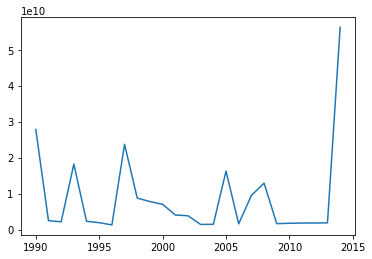

In [ ]:
plt.figure()
plt.plot(years, sums)
plt.show()

In [216]:
pd_df = to_show.toPandas()

In [217]:
pd_df.head(5)

,year,sum(quantity)
0,1990,2.781426e+10
1,1991,2.466542e+09
2,1992,2.141948e+09
3,1993,1.818041e+10
4,1994,2.286637e+09


<Axes: xlabel='year'>

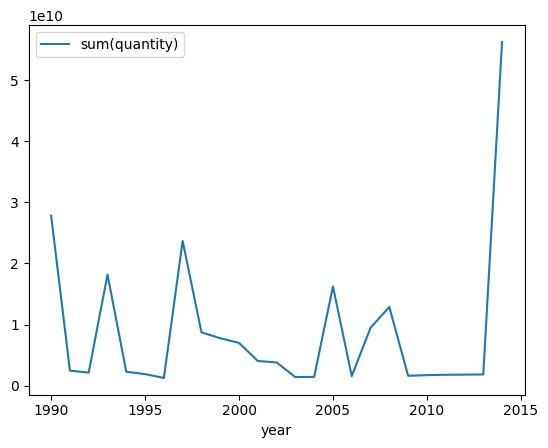

In [218]:
pd_df.plot(x='year', y='sum(quantity)')

# Домашнее задание
- Скачайте dataset iris https://gist.github.com/netj/8836201
- Для каждого типа цветка определите максимальное, минимальное и среднее значение 4-х параметров
- Визуализируйте точечный график (plt.scatter) по каждой паре параметров
- Попробуйте отделить какой-нить тип цветка от всех остальных (сформулируйте правило на основе диаграммы - ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА X БОЛЬШЕ/МЕНЬШЕ Y, ТО ЦВЕТОК СКОРЕЕ ВСЕГО ОТНОСИТСЯ/НЕ ОТНОСИТСЯ К ТИПУ Z)
- Сделайте отдельную колонку для своего предсказания
- Оцените качество (сколько раз Вы угадали с ответом и сколько раз не угадали)